View the full project at: 
https://www.kaggle.com/code/natecekay/analysis-of-health-and-lifestyle-metrics

#Analysis of Health and Lifestyle Metrics
##In this comprehensive analysis, I investigate the interplay between various health and lifestyle indicators. The project analyzes stress levels, sleeping patterns, physical activity, occupation, and other important lifestyle metrics. The project concludes by using machine learning to predict stress levels based on other health and lifestyle metrics. This analysis was completed using RStudio.

In [1]:
library(dplyr)
library(ggplot2)
library(tidyverse)
library(corrplot)
library(caret) 



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
✔ readr     2.1.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
corrplot 0.92 loaded

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress




In [2]:
library(readr)
df <- read_csv("/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv")
head(df)

Rows: 374 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Gender, Occupation, BMI Category, Blood Pressure, Sleep Disorder
dbl (8): Person ID, Age, Sleep Duration, Quality of Sleep, Physical Activity...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia


Checking for missing values

In [3]:
colSums(is.na(df))

Person ID                  Gender                     Age 
                      0                       0                       0 
             Occupation          Sleep Duration        Quality of Sleep 
                      0                       0                       0 
Physical Activity Level            Stress Level            BMI Category 
                      0                       0                       0 
         Blood Pressure              Heart Rate             Daily Steps 
                      0                       0                       0 
         Sleep Disorder 
                      0

Formatting aliases 

In [4]:
df$Occupation <- gsub("Sales Representative", "salesperson", df$Occupation)

In [5]:
df$Occupation <- gsub("salesperson", "Salesperson", df$Occupation)

Warning message:
“The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead.”


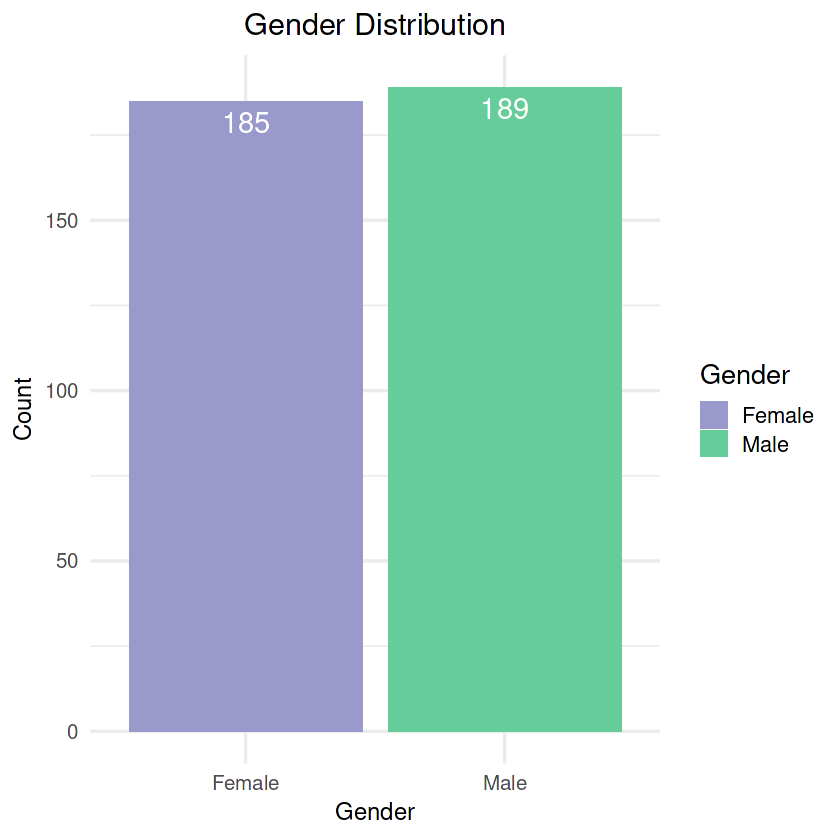

In [6]:
ggplot(df, aes(x = Gender, fill = Gender)) +
  geom_bar() +
  labs(y = "Count", title = "Gender Distribution") +
  geom_text(aes(label = ..count..), stat = "count", vjust = 1.5, colour = "white", size = 6) +
  scale_fill_manual(values = c("#9999CC", "#66CC99")) +
  theme_minimal(base_size = 16) + 
  theme(
    axis.title = element_text(size = 14), 
    axis.text = element_text(size = 12), 
    plot.title = element_text(hjust = 0.5, size = 18) 
  )

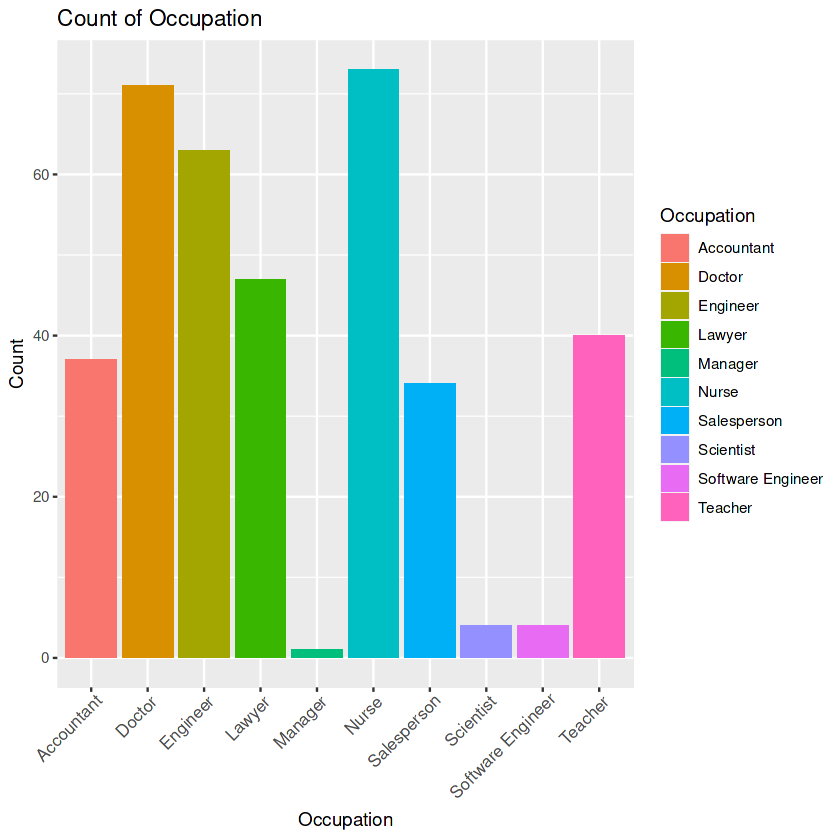

In [7]:
ggplot(df, aes(x = Occupation, fill=Occupation)) +
  geom_bar() +
  labs(y = "Count") +
  theme(axis.text.x=element_text(size=10, angle=45,hjust=0.95)) + 
  ggtitle("Count of Occupation")

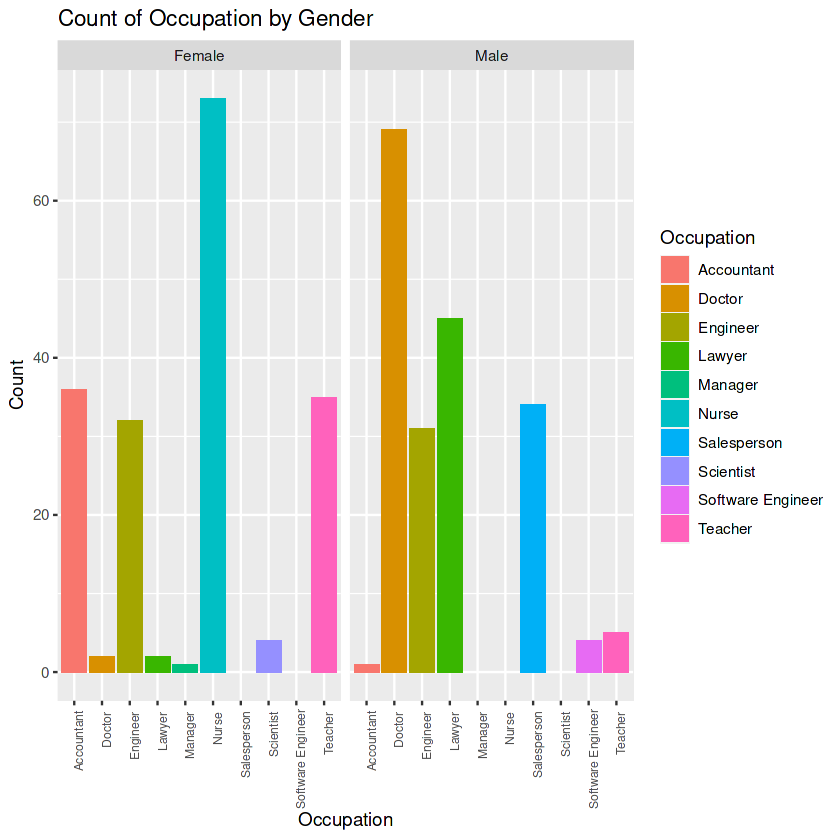

In [8]:
ggplot(df, aes(x = Occupation, fill=Occupation)) +
  geom_bar() +
  labs(y = "Count") +
  theme(axis.text.x=element_text(size=7, angle=90,hjust=0.95)) +
  facet_wrap(vars(Gender)) + 
  ggtitle("Count of Occupation by Gender")

In [9]:
set.seed(42)
#correlation matrix
cor(df[c(3, 5, 6, 7, 8, 11, 12)])

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Age,1.0000000,0.34470936,0.47373388,0.17899272,-0.42234448,-0.22560619,0.05797340
Sleep Duration,0.3447094,1.00000000,0.88321300,0.21236031,-0.81102303,-0.51645489,-0.03953254
Quality of Sleep,0.4737339,0.88321300,1.00000000,0.19289645,-0.89875203,-0.65986473,0.01679141
Physical Activity Level,0.1789927,0.21236031,0.19289645,1.00000000,-0.03413446,0.13697098,0.77272305
Stress Level,-0.4223445,-0.81102303,-0.89875203,-0.03413446,1.00000000,0.67002646,0.18682895
Heart Rate,-0.2256062,-0.51645489,-0.65986473,0.13697098,0.67002646,1.00000000,-0.03030858
Daily Steps,0.0579734,-0.03953254,0.01679141,0.77272305,0.18682895,-0.03030858,1.00000000


##Here we can see which variables had the strongest correlations. Quality of sleep and sleep duration and quality of sleep and stress level had a very strong correlation.

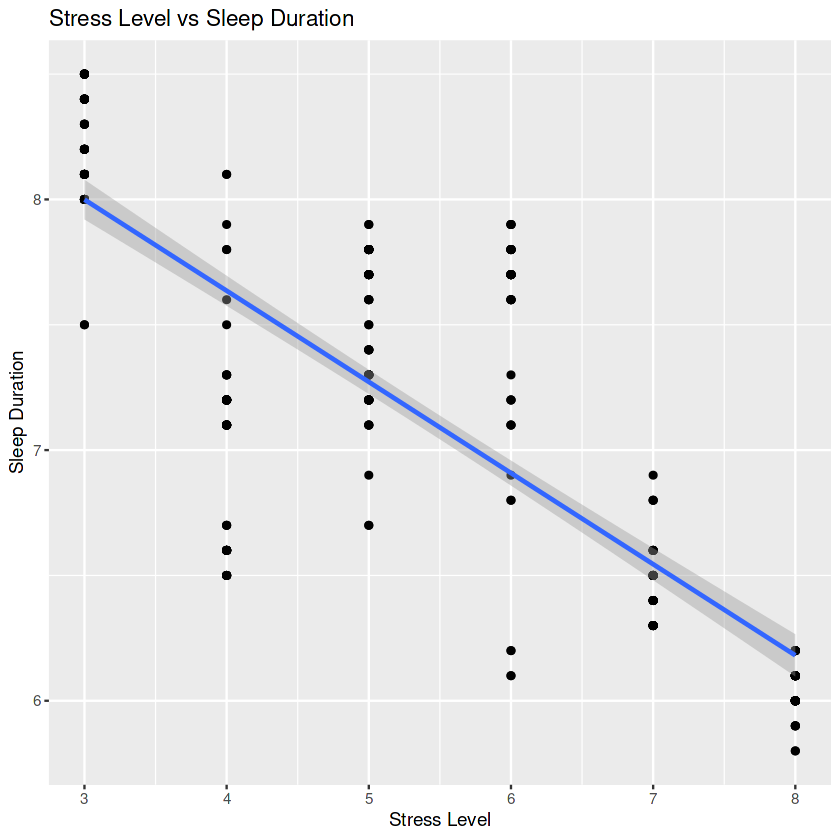

In [10]:
ggplot(df, aes(x = `Stress Level`, y = `Sleep Duration`)) +
  geom_point() +
  geom_smooth(method = "lm", formula = y ~ x) + 
  ggtitle("Stress Level vs Sleep Duration")

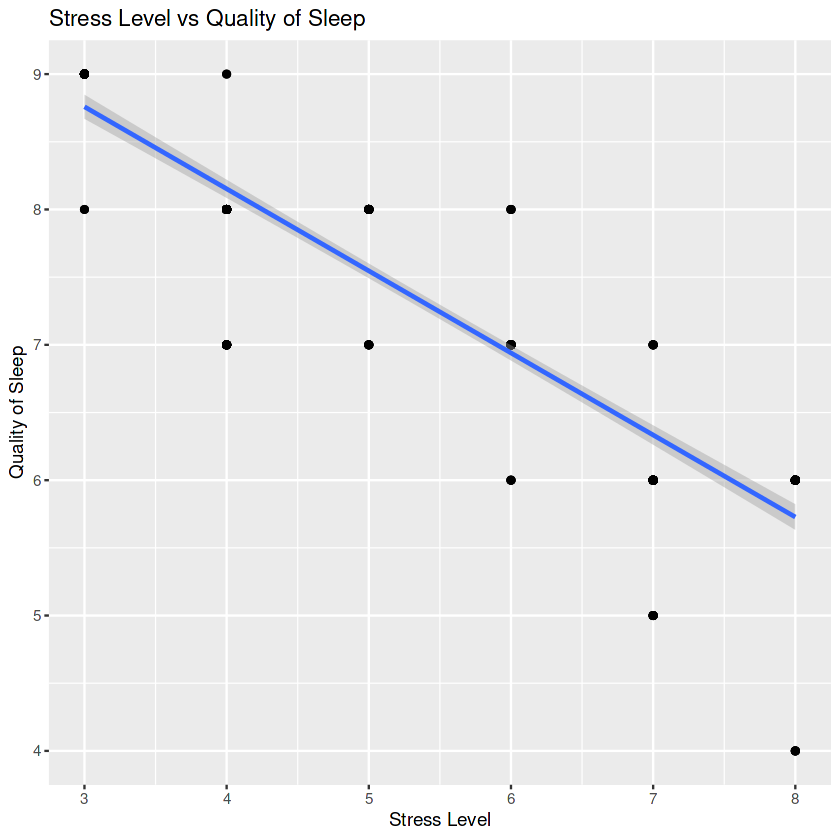

In [11]:
ggplot(df, aes(x = `Stress Level`, y = `Quality of Sleep`)) +
  geom_point() +
  geom_smooth(method = "lm", formula = y ~ x) + 
  ggtitle("Stress Level vs Quality of Sleep")

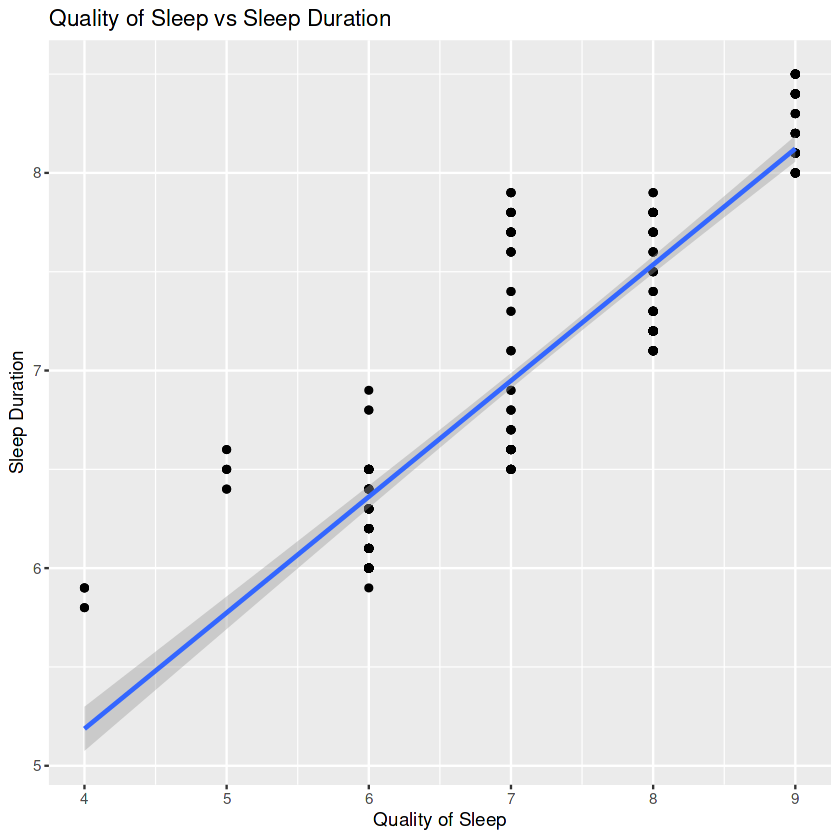

In [12]:
ggplot(df, aes(x = `Quality of Sleep`, y = `Sleep Duration`)) +
  geom_point() +
  geom_smooth(method = "lm", formula = y ~ x) + 
  ggtitle("Quality of Sleep vs Sleep Duration")

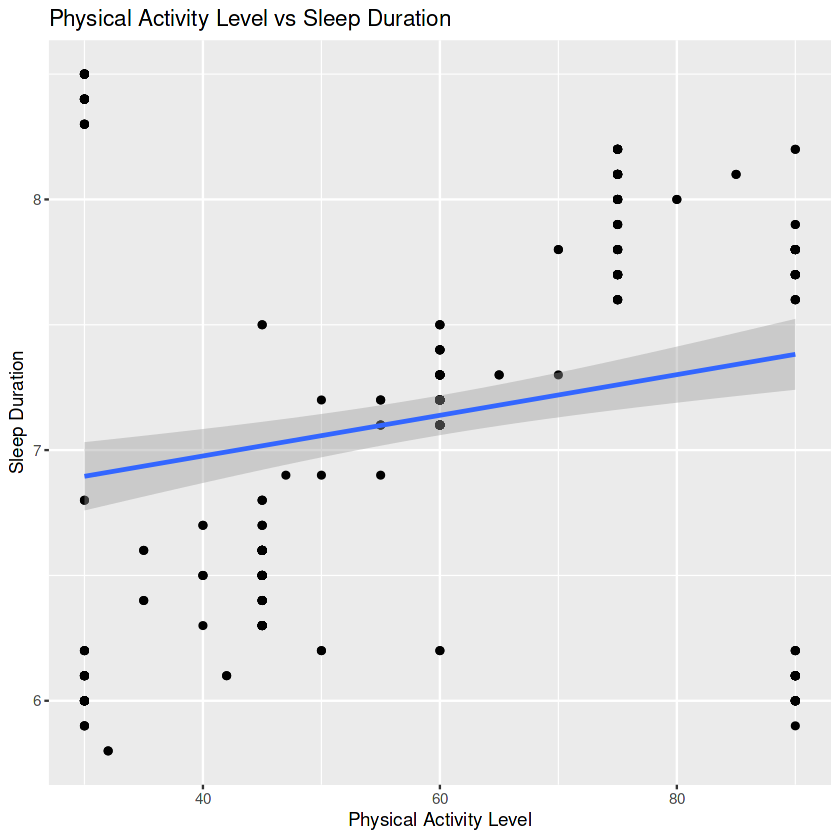

In [13]:
ggplot(df, aes(x = `Physical Activity Level`, y = `Sleep Duration`)) +
  geom_point() +
  geom_smooth(method = "lm", formula = y ~ x) + 
  ggtitle("Physical Activity Level vs Sleep Duration")

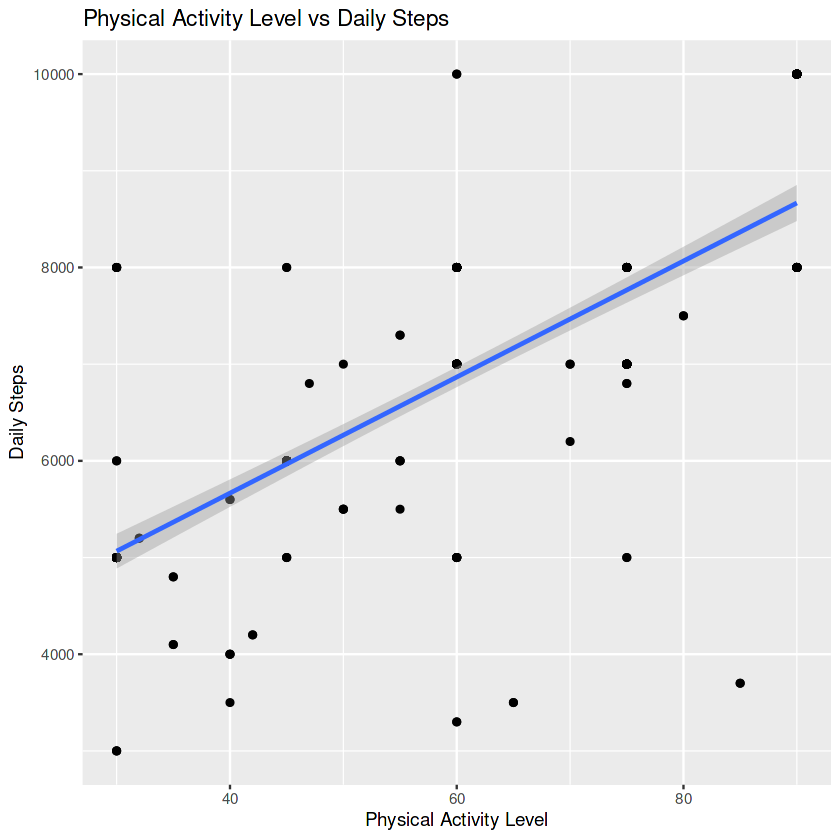

In [14]:
ggplot(df, aes(x = `Physical Activity Level`, y = `Daily Steps`)) +
  geom_point() +
  geom_smooth(method = "lm", formula = y ~ x) + 
  ggtitle("Physical Activity Level vs Daily Steps")

#Physical activity and daily steps had a strong correlation of 0.77


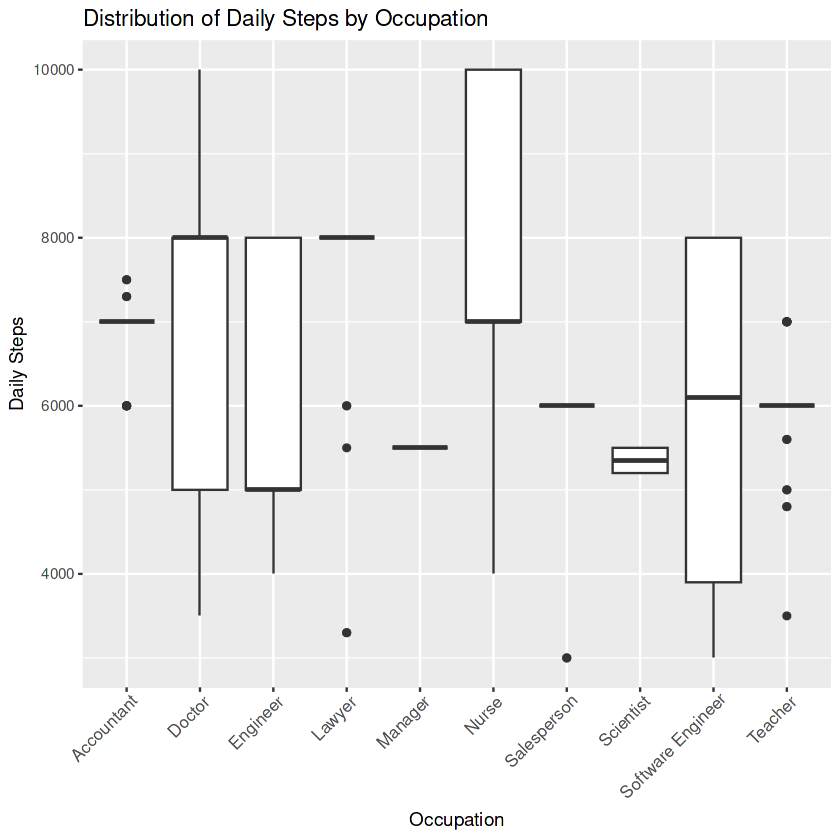

In [15]:
ggplot() + 
  geom_boxplot(data = df, mapping = aes(y = `Daily Steps`, x = Occupation)) +
  theme(axis.text.x=element_text(size=10, angle=45,hjust=0.95)) +
  ggtitle("Distribution of Daily Steps by Occupation")


In [16]:
mean(df$`Daily Steps`)

[1] 6816.845

The participants averaged 6817 daily steps

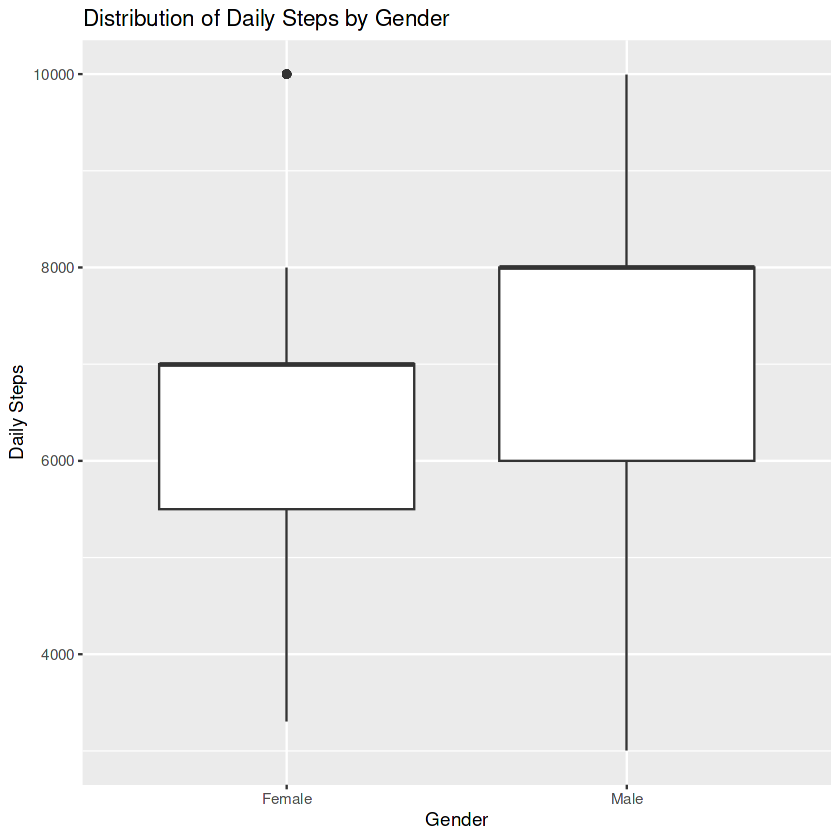

In [17]:
ggplot() + 
  geom_boxplot(data = df, mapping = aes(y = `Daily Steps`, x = Gender)) + 
  ggtitle("Distribution of Daily Steps by Gender")

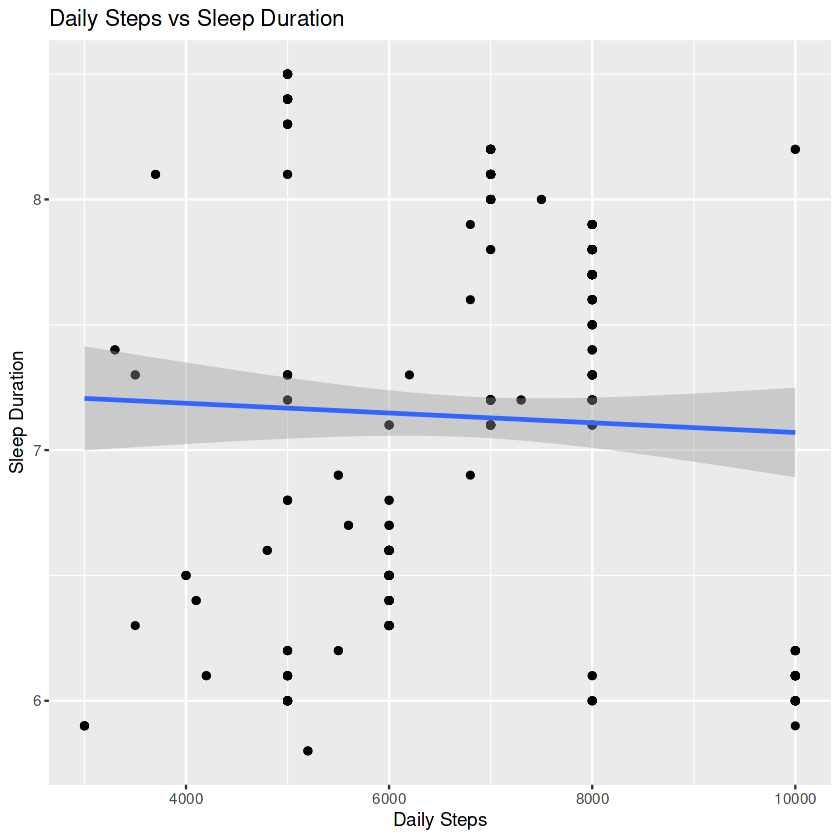

In [18]:
ggplot(df, aes(x = `Daily Steps`, y = `Sleep Duration`)) +
  geom_point() +
  geom_smooth(method = "lm", formula = y ~ x) + 
  ggtitle("Daily Steps vs Sleep Duration")

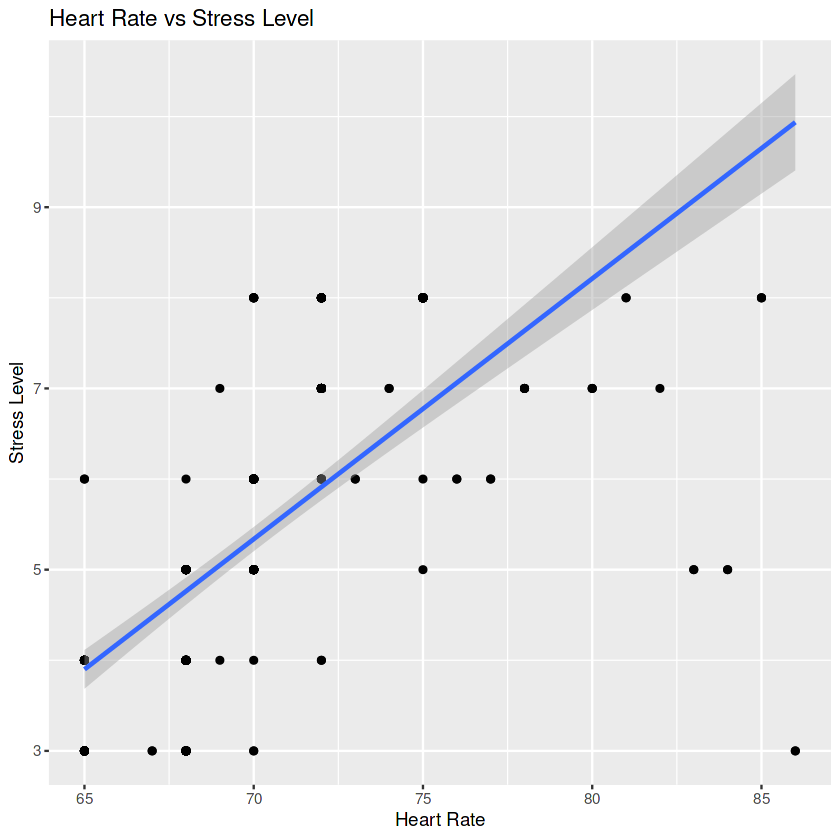

In [19]:
ggplot(df, aes(x = `Heart Rate`, y = `Stress Level`)) +
  geom_point() +
  geom_smooth(method = "lm", formula = y ~ x) + 
  ggtitle("Heart Rate vs Stress Level")

#Sleep duration had a strong negative effect on stress level
#People who had more sleep had a lower stress level, while
#people who got less sleep had a much higher stress level.


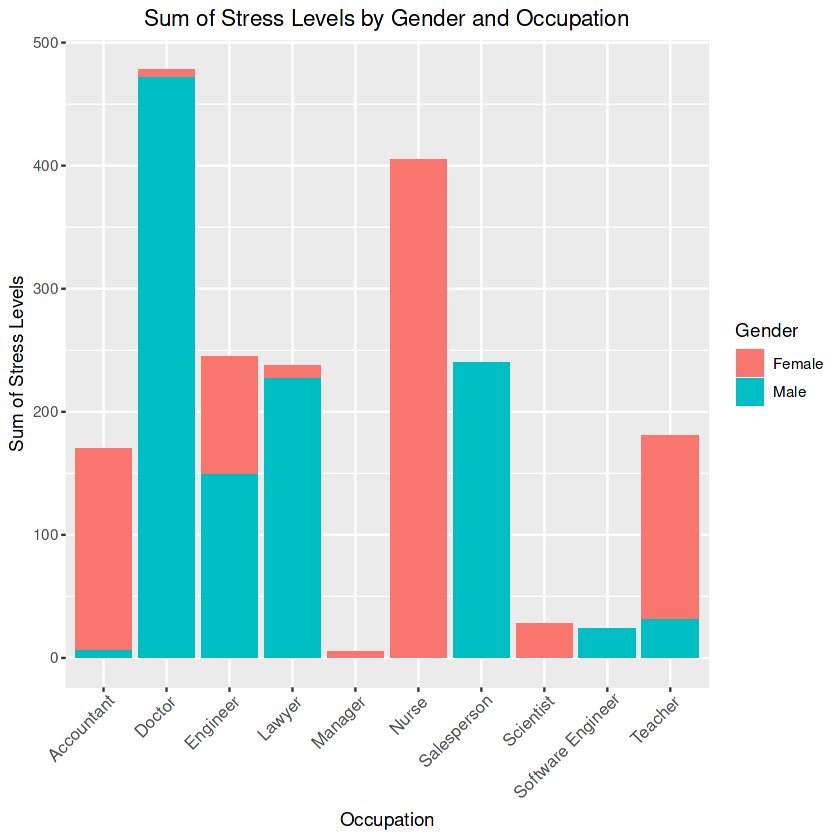

In [20]:
aggregated_data <- df %>%
  group_by(Occupation, Gender) %>%
  summarize(Sum_Stress_Level = sum(`Stress Level`, na.rm = TRUE), .groups = "drop")

ggplot(aggregated_data, aes(x = Occupation, y = Sum_Stress_Level, fill = Gender)) +
  geom_bar(stat = "identity", position = "stack") +
  labs(
    x = "Occupation",
    y = "Sum of Stress Levels",
    fill = "Gender",
    title = "Sum of Stress Levels by Gender and Occupation"
  ) +
  theme(
    axis.text.x = element_text(size = 10, angle = 45, hjust = 0.95),
    plot.title = element_text(hjust = 0.5)
  )

##We can see interesting patterns by looking at the stress levels of the different positions. Doctors, Nurses, and Salespeople had the highest stress levels.

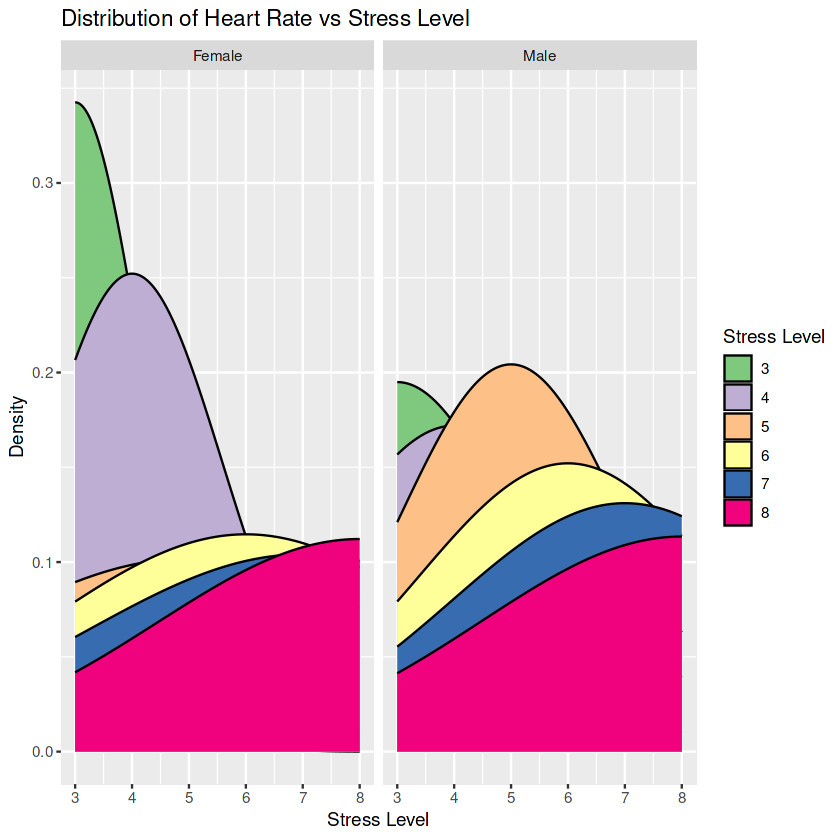

In [21]:
ggplot(df, aes(x = `Stress Level`, fill=as.factor(`Stress Level`))) + geom_density() +
  guides(fill=guide_legend(title="Stress Level")) +
  labs(y = "Density") +
  scale_fill_brewer(palette="Accent") +
  facet_wrap(vars(Gender)) +
  ggtitle("Distribution of Heart Rate vs Stress Level")

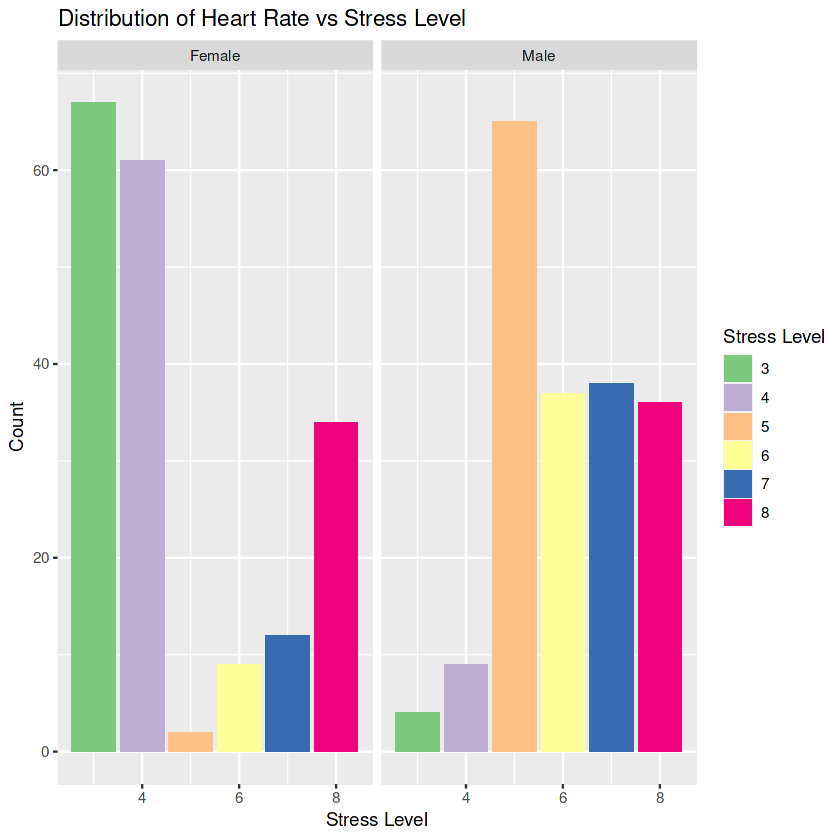

In [22]:
ggplot(df, aes(x = `Stress Level`, fill=as.factor(`Stress Level`))) + geom_bar() +
  guides(fill=guide_legend(title="Stress Level")) +
  labs(y = "Count") +
  scale_fill_brewer(palette="Accent") +
  facet_wrap(vars(Gender)) +
  ggtitle("Distribution of Heart Rate vs Stress Level")

In [23]:
numeric_df <- df %>% select(where(is.numeric))

In [24]:
numeric_df <- numeric_df %>%
  select(-`Person ID`, -`Physical Activity Level`)

In [25]:
numeric_df

Age,Sleep Duration,Quality of Sleep,Stress Level,Heart Rate,Daily Steps
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
27,6.1,6,6,77,4200
28,6.2,6,8,75,10000
28,6.2,6,8,75,10000
28,5.9,4,8,85,3000
28,5.9,4,8,85,3000
28,5.9,4,8,85,3000
29,6.3,6,7,82,3500
29,7.8,7,6,70,8000
29,7.8,7,6,70,8000


In [26]:
set.seed(42) 
train_index <- createDataPartition(numeric_df$`Stress Level`, p = 0.8, list = FALSE)
train_data <- numeric_df[train_index, ]
test_data <- numeric_df[-train_index, ]

In [27]:
model <- train(
  `Stress Level` ~ ., 
  data = train_data,
  method = "rf",  
  trControl = trainControl(method = "cv", number = 5)
)

In [28]:
summary(model$finalModel)

                Length Class      Mode     
call              4    -none-     call     
type              1    -none-     character
predicted       300    -none-     numeric  
mse             500    -none-     numeric  
rsq             500    -none-     numeric  
oob.times       300    -none-     numeric  
importance        5    -none-     numeric  
importanceSD      0    -none-     NULL     
localImportance   0    -none-     NULL     
proximity         0    -none-     NULL     
ntree             1    -none-     numeric  
mtry              1    -none-     numeric  
forest           11    -none-     list     
coefs             0    -none-     NULL     
y               300    -none-     numeric  
test              0    -none-     NULL     
inbag             0    -none-     NULL     
xNames            5    -none-     character
problemType       1    -none-     character
tuneValue         1    data.frame list     
obsLevels         1    -none-     logical  
param             0    -none-   

In [29]:
predictions <- predict(model, newdata = test_data)

In [30]:
actuals <- test_data$`Stress Level`
rmse <- sqrt(mean((predictions - actuals)^2)) 
r2 <- cor(predictions, actuals)^2  

cat("Test RMSE:", rmse, "\n")
cat("Test R-squared:", r2, "\n")

Test RMSE: 0.3507331 
Test R-squared: 0.9619375 


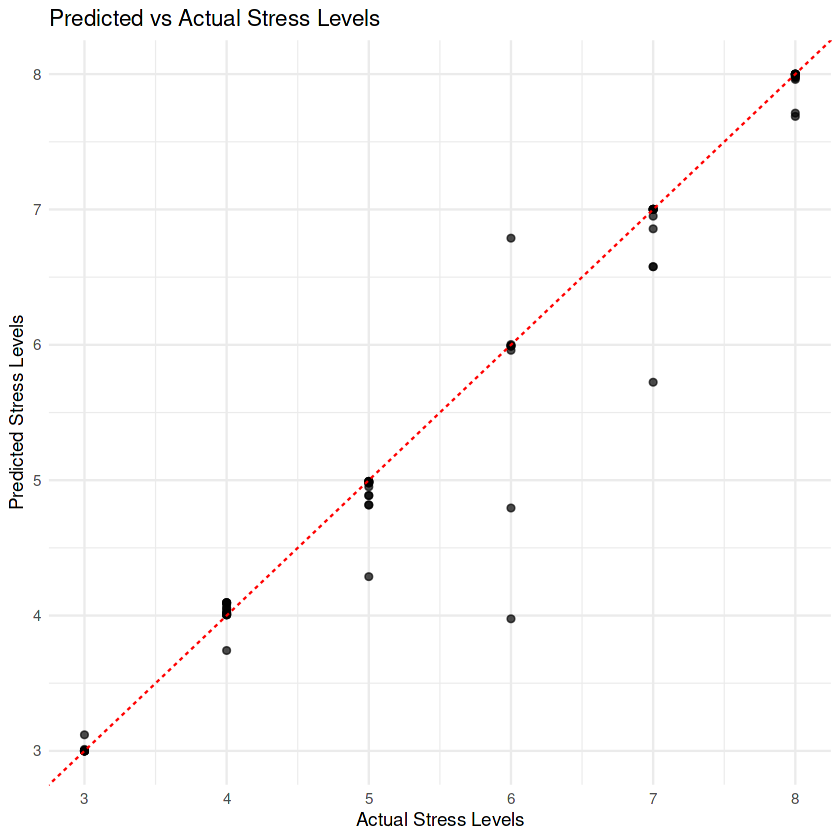

In [31]:
ggplot(data = data.frame(Actual = actuals, Predicted = predictions), aes(x = Actual, y = Predicted)) +
  geom_point(alpha = 0.7) +
  geom_abline(intercept = 0, slope = 1, color = "red", linetype = "dashed") +
  labs(title = "Predicted vs Actual Stress Levels", x = "Actual Stress Levels", y = "Predicted Stress Levels") +
  theme_minimal()

In [32]:
train_predictions <- predict(model, newdata = train_data)
train_actuals <- train_data$`Stress Level`

In [33]:
train_rmse <- sqrt(mean((train_predictions - train_actuals)^2))
train_r2 <- cor(train_predictions, train_actuals)^2


In [34]:
test_predictions <- predict(model, newdata = test_data)
test_actuals <- test_data$`Stress Level`

In [35]:
test_rmse <- sqrt(mean((test_predictions - test_actuals)^2))
test_r2 <- cor(test_predictions, test_actuals)^2

In [36]:
avg_r2 <- (train_r2 + test_r2) / 2

In [37]:
cat("Model Scores", "\n")
cat("Training RMSE:", train_rmse, "\n")
cat("Training R-squared:", train_r2, "\n")
cat("Test RMSE:", test_rmse, "\n")
cat("Test R-squared:", test_r2, "\n")
cat("Average R-squared:", avg_r2, "\n")

Model Scores 
Training RMSE: 0.1460082 
Training R-squared: 0.9933403 
Test RMSE: 0.3507331 
Test R-squared: 0.9619375 
Average R-squared: 0.9776389 


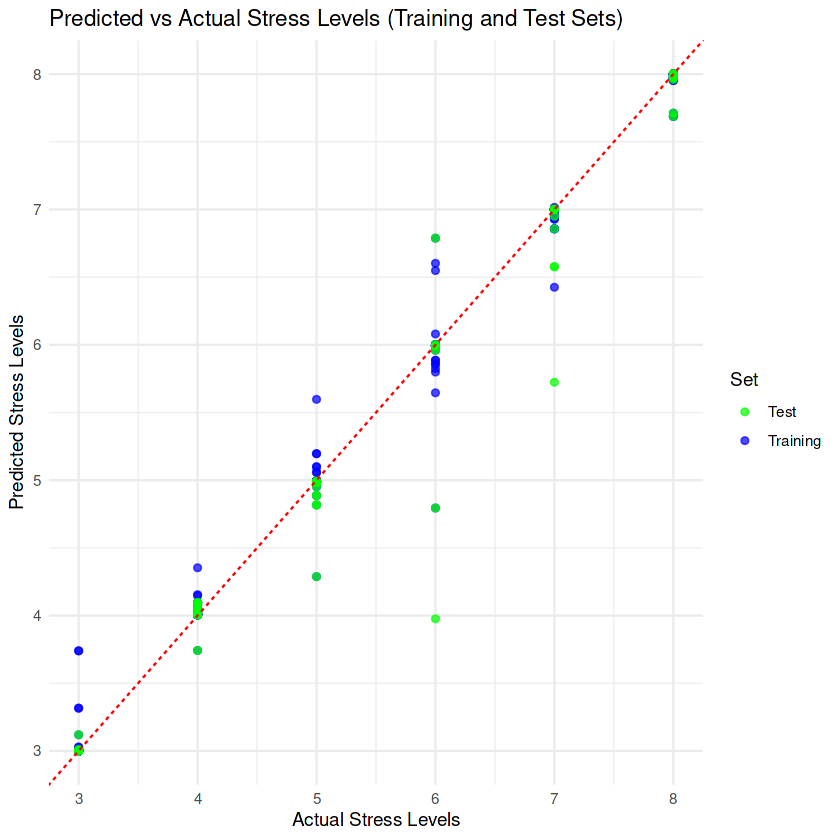

In [38]:
combined_data <- data.frame(
  Actual = c(train_actuals, test_actuals),
  Predicted = c(train_predictions, test_predictions),
  Set = c(rep("Training", length(train_actuals)), rep("Test", length(test_actuals)))
)

ggplot(data = combined_data, aes(x = Actual, y = Predicted, color = Set)) +
  geom_point(alpha = 0.7) +
  geom_abline(intercept = 0, slope = 1, color = "red", linetype = "dashed") +
  labs(
    title = "Predicted vs Actual Stress Levels (Training and Test Sets)",
    x = "Actual Stress Levels",
    y = "Predicted Stress Levels"
  ) +
  scale_color_manual(values = c("Training" = "blue", "Test" = "green")) +
  theme_minimal()

The model performs relatively well on both the training and the test sets, with an average R-squared score of 0.97. The high R-squared values for both training and test sets indicate the model captures most of the variability in the target variable, stress levels. There is no evidence of severe overfitting or underfitting based on these scores. The model proves efficacy in predicting stress levels based on the other health and lifestyle metrics included in the dataset, the model accurately predicts an average of 97.8% of the variance in stress levels. 